#                                   HABERMAN 'S SURVIVAL DATA 
#                                         ( EXPLORATORY DATA ANALYSIS)

In [18]:
#importing necessary packages
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

## Info about dataset from github
Title: Haberman's Survival Data

Sources: (a) Donor: Tjen-Sien Lim (limt@stat.wisc.edu) (b) Date: March 4, 1999

Past Usage:

Relevant Information: The dataset contains cases from a study that was conducted between 1958 and 1970 at the University 
of Chicago's Billings Hospital on the survival of patients who had undergone surgery for breast cancer.

Number of Instances: 306

Number of Attributes: 4 (including the class attribute)

Attribute Information:

Age of patient at time of operation (numerical)
Patient's year of operation (year - 1900, numerical)
Number of positive axillary nodes detected (numerical)
Survival status (class attribute) 1 = the patient survived 5 years or longer 2 = the patient died within 5 year
Missing Attribute Values: None

##                                                    Analysis Begins

In [19]:
#reading haberman cancer survival dataset as a dataframe of pandas and setting header as
#there is no column names provided in dataset file
haberFrame= pd.read_csv('haberman.csv',header=None)
haberFrame.columns=['Age','Year','Aux_Nodes','Survival_Stat']

In [20]:
print(haberFrame.ndim)

2


In [21]:
print(haberFrame.shape)

(306, 4)


In [22]:
#analysing first 5 rows to get overview
haberFrame.head()

,Age,Year,Aux_Nodes,Survival_Stat
0,30,64,1,1
1,30,62,3,1
2,30,65,0,1
3,31,59,2,1
4,31,65,4,1


In [23]:
#setting years to real values
haberFrame.Year+=1900

In [24]:
haberFrame.head()

,Age,Year,Aux_Nodes,Survival_Stat
0,30,1964,1,1
1,30,1962,3,1
2,30,1965,0,1
3,31,1959,2,1
4,31,1965,4,1


In [25]:
haberFrame['Survival_Stat'].value_counts()

1    225
2     81
Name: Survival_Stat, dtype: int64

In [26]:
225*100/(225+81)

73.52941176470588

**Observation
* We got 4 numerical attributes(Features) AGE, YEAR, AUXILLIARY NODES, SURVIVAL STATUS
* There are 306 data points as different patients
* We got here an IMBALANCED DATASETS as number of datapoints for both classes are not equal in any sense
   (class) Patients survived = 225
   (class) Patients died = 81
* 73.5% patients were alive
**Objective
 Our objective here is to find the relation between (year, age and a auxillary nodes count) and (Survival status)

In [27]:
haberFrame['Survival_Stat'][haberFrame['Survival_Stat']==1]='Alive'
haberFrame['Survival_Stat'][haberFrame['Survival_Stat']==2]='Dead'
haberFrame.head(10)

,Age,Year,Aux_Nodes,Survival_Stat
0,30,1964,1,Alive
1,30,1962,3,Alive
2,30,1965,0,Alive
3,31,1959,2,Alive
4,31,1965,4,Alive
5,33,1958,10,Alive
6,33,1960,0,Alive
7,34,1959,0,Dead
8,34,1966,9,Dead
9,34,1958,30,Alive


In [28]:
print(haberFrame.describe())

              Age         Year   Aux_Nodes
count  306.000000   306.000000  306.000000
mean    52.457516  1962.852941    4.026144
std     10.803452     3.249405    7.189654
min     30.000000  1958.000000    0.000000
25%     44.000000  1960.000000    0.000000
50%     52.000000  1963.000000    1.000000
75%     60.750000  1965.750000    4.000000
max     83.000000  1969.000000   52.000000


**Observation
* Range of Age -> [30 to 83] Mean 52.5
* Range of Age -> [0 to 52] Mean 4
* 75% of patients had Auxillary nodes less than 4
* 50% of patients had Ausillary nodes less than 1

##                      UniVariate Analysis(PDF, CDF, BOXPLOTs, VIOlLINPLOTs)

**Univariate analysis is the simplest form of analyzing data. “Uni” means “one”, "variate" means "variable or numeric variable" so, in other words your data has only one variable. It doesn't deal with causes or relationships (unlike regression) and it's major purpose is to describe; it takes data, summarizes that data and finds patterns in the data.

## Distribution plots

<Figure size 432x288 with 0 Axes>

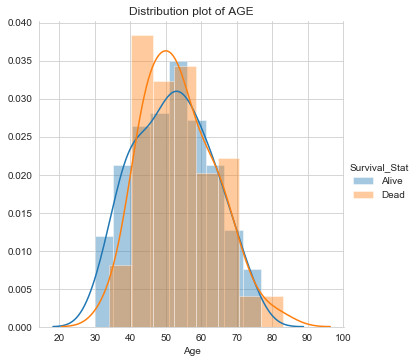

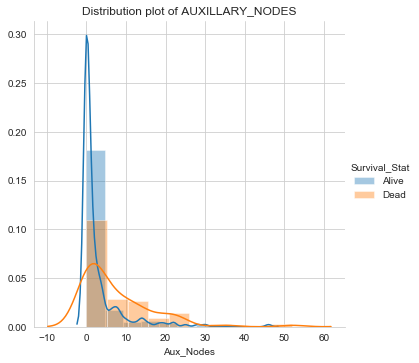

In [29]:
sns.set_style('whitegrid')
plt.figure(1)
sns.FacetGrid(data=haberFrame,hue='Survival_Stat',height=5)\
    .map(sns.distplot,'Age')\
    .add_legend()
plt.title('Distribution plot of AGE')
plt.figure(2)
sns.FacetGrid(data=haberFrame,hue='Survival_Stat',height=5)\
    .map(sns.distplot,'Aux_Nodes',bins=10).add_legend()
plt.title('Distribution plot of AUXILLARY_NODES')
#plt.figure(3)
#sns.FacetGrid(data=haberFrame,hue='Survival_Stat',height=5)\
#    .map(sns.distplot,'Year').add_legend()
#plt.title('Distribution plot of YEAR')
plt.show()

**Observation
* from first plot: * patients with age 30-40 had greater chance of survival(as we can see blue curve was above)
                   * patients with age 40-60 had greater chance of death 
* from second plot: * patients with auxillary nodes between 0-5 was had very high chances of survival
* distplot of year was not useful

## PDFs and CDFs

AGE-->
[30.  35.3 40.6 45.9 51.2 56.5 61.8 67.1 72.4 77.7 83. ]
[0.05228758 0.08823529 0.1503268  0.17320261 0.17973856 0.13398693
 0.13398693 0.05882353 0.02287582 0.00653595]
[0.05228758 0.14052288 0.29084967 0.46405229 0.64379085 0.77777778
 0.91176471 0.97058824 0.99346405 1.        ]
YEAR-->
[1958.  1959.1 1960.2 1961.3 1962.4 1963.5 1964.6 1965.7 1966.8 1967.9
 1969. ]
[0.20588235 0.09150327 0.08496732 0.0751634  0.09803922 0.10130719
 0.09150327 0.09150327 0.08169935 0.07843137]
[0.20588235 0.29738562 0.38235294 0.45751634 0.55555556 0.65686275
 0.74836601 0.83986928 0.92156863 1.        ]
Auxillary Nodes-->
[ 0.   5.2 10.4 15.6 20.8 26.  31.2 36.4 41.6 46.8 52. ]
[0.77124183 0.09803922 0.05882353 0.02614379 0.02941176 0.00653595
 0.00326797 0.         0.00326797 0.00326797]
[0.77124183 0.86928105 0.92810458 0.95424837 0.98366013 0.99019608
 0.99346405 0.99346405 0.99673203 1.        ]


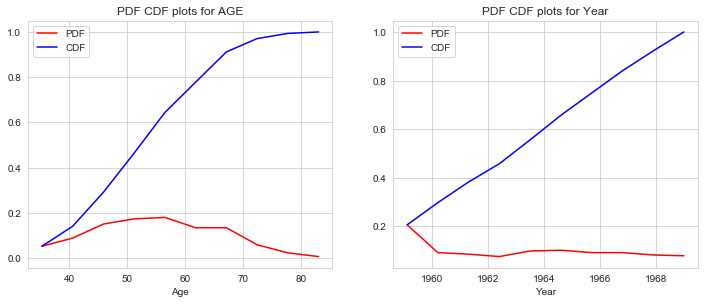

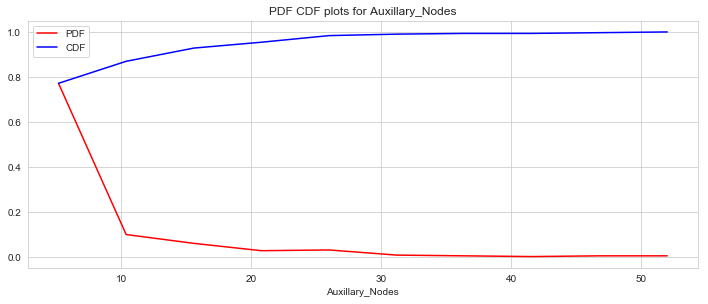

In [30]:
sns.set_style('whitegrid')
plt.figure(figsize=(12,10))
plt.subplot(2,2,1)
agecount,bins= np.histogram(haberFrame['Age'],density=True)
pdf= agecount/sum(agecount)
cdf= np.cumsum(pdf)
plt.plot(bins[1:],pdf,'r-',label='PDF')
plt.plot(bins[1:],cdf,'b-',label='CDF')
plt.xlabel('Age')
plt.title('PDF CDF plots for AGE')
plt.legend()
print('AGE-->',bins,pdf,cdf,sep='\n')

plt.subplot(2,2,2)
agecount,bins= np.histogram(haberFrame['Year'],density=True)
pdf= agecount/sum(agecount)
cdf= np.cumsum(pdf)
plt.plot(bins[1:],pdf,'r-',label='PDF')
plt.plot(bins[1:],cdf,'b-',label='CDF')
plt.title('PDF CDF plots for Year')
plt.xlabel('Year')
plt.legend()
print('YEAR-->',bins,pdf,cdf,sep='\n')

plt.figure(figsize=(12,10))
plt.subplot(2,1,1)
agecount,bins= np.histogram(haberFrame['Aux_Nodes'],density=True)
pdf= agecount/sum(agecount)
cdf= np.cumsum(pdf)
plt.plot(bins[1:],pdf,'r-',label='PDF')
plt.plot(bins[1:],cdf,'b-',label='CDF')
plt.title('PDF CDF plots for Auxillary_Nodes')
plt.xlabel('Auxillary_Nodes')
plt.legend()
print('Auxillary Nodes-->',bins,pdf,cdf,sep='\n')
plt.show()

**Observation
* we can observe that, in CDF of auxillary nodes the curve starts at 80%, which means about 80% of patints were found 
  with having nodes less than 5
* in third curve by looking PDF, maximum density of patients was having node counts as 5(around)
* PDF & CDF of year and age was not found useful.

## Boxplots

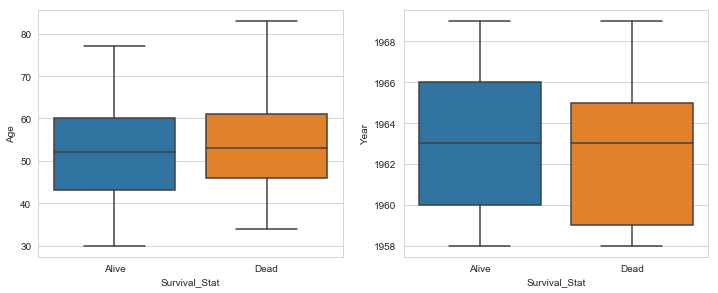

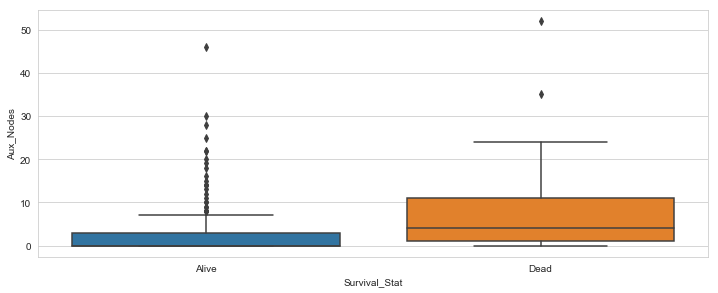

In [31]:
plt.figure(figsize=(12,10))
plt.subplot(2,2,1)
sns.boxplot(data=haberFrame,x='Survival_Stat',y='Age')
plt.subplot(2,2,2)
sns.boxplot(data=haberFrame,x='Survival_Stat',y='Year')
plt.figure(figsize=(12,10))
plt.subplot(2,1,1)
sns.boxplot(data=haberFrame,x='Survival_Stat',y='Aux_Nodes')
plt.show()

**Observation
* plot 1: >patients of age 30-42 had greater chance of survival(which supports our observation with distribution plots)
* plot 2: >patients who got operated till 1960 had greater chances of death
          >after 1965 patients had greater chance of death
* plot 3: >around 80 percentile of alive patients was having 5 auxillary nodes present
          >50-75 percentile of dead patients was having auxillary nodes 5-12

## ViolinPlots

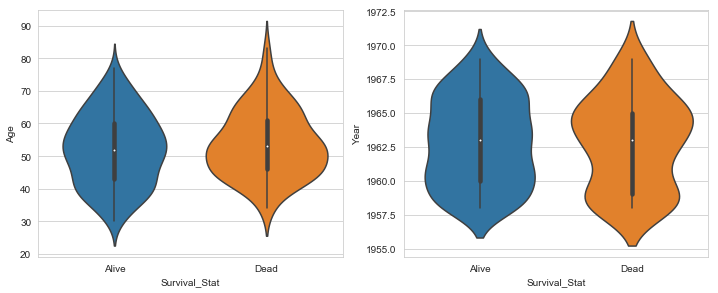

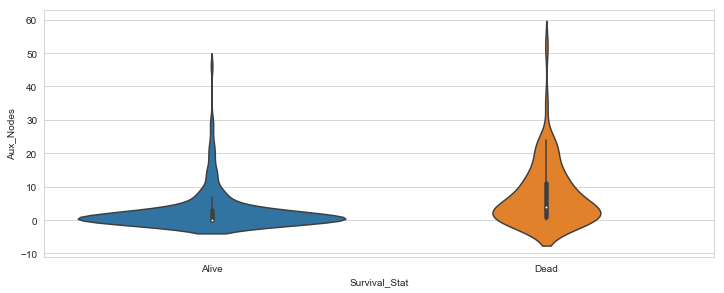

In [32]:
plt.figure(figsize=(12,10))
plt.subplot(2,2,1)
sns.violinplot(data=haberFrame,x='Survival_Stat',y='Age')
plt.subplot(2,2,2)
sns.violinplot(data=haberFrame,x='Survival_Stat',y='Year')
plt.figure(figsize=(12,10))
plt.subplot(2,1,1)
sns.violinplot(data=haberFrame,x='Survival_Stat',y='Aux_Nodes')
plt.show()

**Observation 3
* From all above univariate analysis we find that AUXILLARY NODES attribute is important feature 
  for classification of Survival
* In plot 3: we can directly see that maximum patients alive was having auxillary nodes between 0-5(as we can see width of 
              voilin of alive is larger) and after 5 the width of death increased which means patints had greater chance of                   death after that

##                                   Bivariate Analysis(pairplot, scatterplot)

**Bivariate analysis is one of the simplest forms of quantitative (statistical) analysis. It involves the analysis of two variables (often denoted as X, Y), for the purpose of determining the empirical relationship between them

## Scatter plots
A scatter plot is a useful visual representation of the relationship between two numerical variables (attributes) and is usually drawn before working out a linear correlation or fitting a regression line. The resulting pattern indicates the type (linear or non-linear) and strength of the relationship between two variables.

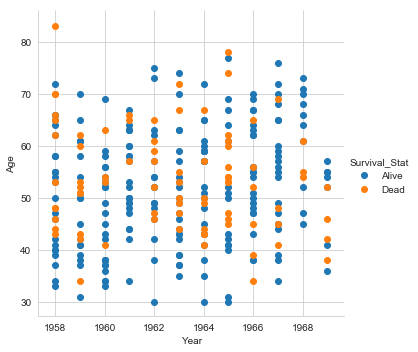

In [33]:
sns.set_style('whitegrid')
sns.FacetGrid(haberFrame,hue='Survival_Stat',height=5)\
    .map(plt.scatter,'Year','Age').add_legend()
plt.show()

**Observation
> we can confirm our observations of previous plots by looking at plot 1: patients of age less than 40 had 
  great survival chances
> AGE vs NODES and YEAR vs NODES scatter plots are not useful as the points were overlapping

## PairPlot

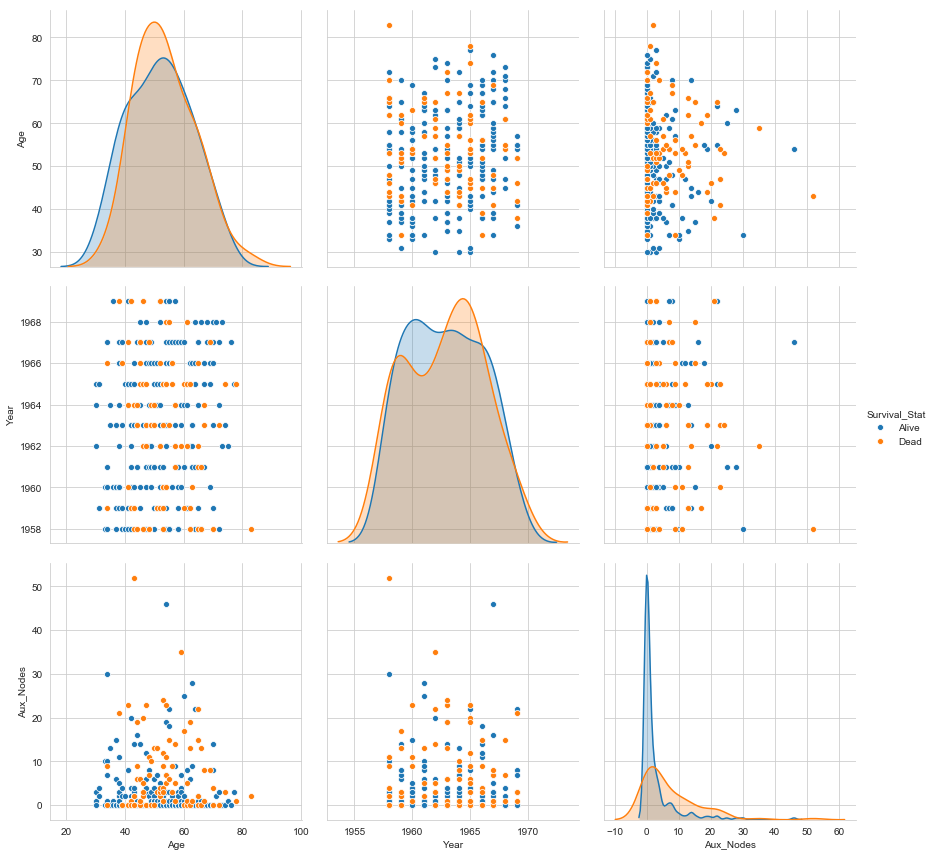

In [34]:
sns.set_style('whitegrid')
sns.pairplot(haberFrame,hue='Survival_Stat',height=4)
plt.show()

**Observation
* in 7th subplot we can see blue points (which denotes alive patients) are more between 0-5 nodes
* in 2nd subplot we can say patients with age <40 was having greater chances if survival

## Median, Percentile, Quantile, MAD

In [35]:
#Median, Quantiles, Percentiles, IQR.
print("\nMedians:")
print('Age',np.median(haberFrame['Age']))
print('Year',np.median(haberFrame['Year']))
print('Auxillary_Nodes',np.median(haberFrame['Aux_Nodes']))

print("\nQuantiles:")
print('Age',np.percentile(haberFrame['Age'],np.arange(0, 100, 25)))
print('Year',np.percentile(haberFrame['Year'],np.arange(0, 100, 25)))
print('Auxillary_Nodes',np.percentile(haberFrame['Aux_Nodes'], np.arange(0, 100, 25)))

print("\n90th Percentiles:")
print('Age',np.percentile(haberFrame['Age'],90))
print('Year',np.percentile(haberFrame['Year'],90))
print('Auxillary_Nodes',np.percentile(haberFrame['Aux_Nodes'], 90))

from statsmodels import robust
print ("\nMedian Absolute Deviation")
print('Age',robust.mad(haberFrame['Age']))
print('Year',robust.mad(haberFrame['Year']))
print('Auxillary_Nodes',robust.mad(haberFrame['Aux_Nodes']))


Medians:
Age 52.0
Year 1963.0
Auxillary_Nodes 1.0

Quantiles:
Age [30.   44.   52.   60.75]
Year [1958.   1960.   1963.   1965.75]
Auxillary_Nodes [0. 0. 1. 4.]

90th Percentiles:
Age 67.0
Year 1967.0
Auxillary_Nodes 13.0

Median Absolute Deviation
Age 11.860817748044816
Year 4.447806655516806
Auxillary_Nodes 1.482602218505602


**Observation
* Range of Age -> [30 to 83] Mean 52.5
* Range of Aux_nodes -> [0 to 52] Mean 4
* std of Age 10.803452 year 3.249405 auxillary nodes 7.189654
* Median Absolute Deviation
  Age 11.86
  Year 4.44
  Auxillary_Nodes 1.48
* From boxplot and distribution plot of year we can see that there is grater chance of survival of 
   patients who were treated after 1965 and the patients treated before 1959 had lower chance of survival
* Density of patients with less than or equal to 5 positive lymph nodes was about 80%
* In starting years chances of death was more but in ending years chances of survival increased